In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beakerx import *

from pycta.portfolio import Portfolio
from pycta.analysis import Analysis
from pycta.signal import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
mu = np.tanh(prices.apply(returns_adjust, com=32, clip=4.2).cumsum().apply(osc))
vola = prices.pct_change().ewm(com=32, min_periods=32).std()

# compute the series of Euclidean norms by compute the sum of squares for each row
euclid_norm = np.sqrt((mu*mu).sum(axis=1))

# Divide each column of mu by the Euclidean norm
risk_scaled = mu.apply(lambda x: x/euclid_norm, axis=0)

portfolio = Portfolio(prices=prices, position=risk_scaled/vola)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                         17.54
Annua Volatility                     16.03
Annua Sharpe Ratio (r_f = 0)          1.09
Max Drawdown                         36.16
Return                          274,376.40
Kurtosis                              3.45
dtype: object

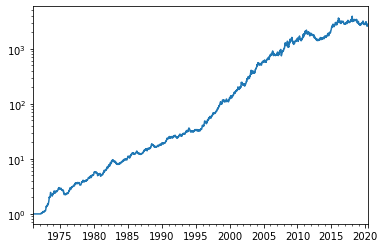

In [5]:
a.nav.plot(logy=True)
plt.show()

In [6]:
a.monthlytable

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,2.97%,-4.78%,-4.43%,2.22%,1.14%,,,,,,,,12.95%,-3.12%
2019,-9.37%,-1.02%,-0.12%,3.14%,-2.73%,4.69%,3.48%,6.59%,-7.33%,-4.95%,1.50%,-1.05%,16.88%,-8.17%
2018,8.01%,-10.81%,-1.11%,2.49%,-3.80%,0.50%,0.82%,4.46%,-1.73%,-8.36%,-3.19%,3.00%,18.33%,-10.74%
2017,-1.49%,6.51%,0.96%,3.57%,3.08%,-4.05%,0.86%,-0.35%,-0.43%,8.09%,0.22%,4.69%,12.07%,23.16%
2016,8.92%,3.37%,-9.58%,-8.12%,-0.84%,7.47%,1.71%,-3.12%,3.39%,-8.31%,-1.28%,-1.96%,20.84%,-9.88%
2015,12.00%,-2.57%,9.66%,-7.41%,4.28%,-2.55%,13.37%,-4.04%,4.41%,-4.93%,9.73%,0.31%,24.95%,33.82%
2014,-1.38%,3.23%,-0.52%,3.01%,3.07%,3.75%,-4.30%,5.80%,5.56%,-1.64%,9.57%,8.56%,14.60%,39.49%
2013,-0.10%,-0.84%,2.69%,4.75%,1.54%,-3.32%,3.54%,-3.22%,0.76%,3.31%,4.95%,1.39%,9.62%,16.11%
2012,1.45%,-3.73%,-0.98%,1.39%,-1.90%,-11.04%,3.98%,-4.79%,-3.57%,-2.11%,-0.55%,-1.94%,13.10%,-22.02%


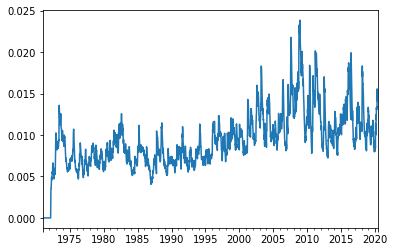

In [7]:
a.std.plot(kind="line")
plt.show()